In [1]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.optimize import curve_fit
from scipy.stats import pearsonr
from scipy.stats import spearmanr

(0.35137002120415317, 0.494635196278772)
(0.8108902138884947, 0.05026224638249094)
SpearmanrResult(correlation=0.2571428571428572, pvalue=0.6227871720116618)
SpearmanrResult(correlation=0.48571428571428577, pvalue=0.3287230320699709)


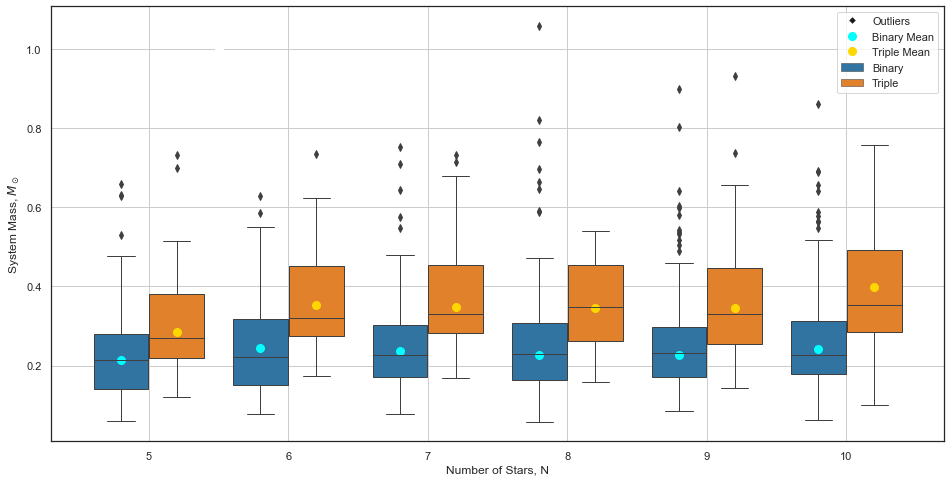

In [34]:
# Setting how many files of data we have
nFiles = 6
parameters = ["5-100-2", "6-100-2", "7-100-2", "8-100-2", "9-100-2", "10-100-2"]
column = 2
nStars = [5, 6, 7, 8, 9, 10]
normalisation = 1.99e30

# Creating dataframe columns
columns = ["SemiMajorAxis", "Type", "NStars"]

# Creating empty lists
a = []
t = []
n = []
meansB = []
SDsB = []
meansT = []
SDsT = []

# Looping through every file
for i in range(nFiles):
    # Generating the filenames
    filenameB = "binaryData" + parameters[i] + ".csv"
    filenameT = "tripleData" + parameters[i] + ".csv"
    
    # Loading in the files as dataframes
    dataFrameB = pd.read_csv(filenameB, header=None)
    dataFrameT = pd.read_csv(filenameT, header=None)
    
    # Getting rid of NaN in the triple data
    dataFrameT = dataFrameT.dropna()
    
    # Extracting the semi-major axis data
    aB = dataFrameB[column].to_numpy()
    aT = dataFrameT[column].to_numpy()
    
    # Outliers Binaries
    q1B, q2B, q3B = np.percentile(aB, [25, 50, 75])
    IQRB = q3B - q1B
    upperB = q3B + 1.5*IQRB
    lowerB = q1B - 1.5*IQRB    
    aBNO = aB[aB<=upperB]
    aBNO = aBNO[aBNO>=lowerB]
    
    meansB.append(np.mean(aBNO/normalisation))
    SDsB.append(np.std(aBNO)/normalisation)
    
    # Calculating the quartiles etc
    q1T, q2T, q3T = np.percentile(aT, [25, 50, 75])

    # Finding the inter-quartile range
    IQRT = q3T - q1T

    # Finding the outlier ranges
    upperT = q3T + 1.5*IQRT
    lowerT = q1T - 1.5*IQRT

    # Getting the binaires outside this range
    aTNO = aT[aT<=upperT]
    aTNO = aTNO[aTNO>=lowerT]

    # Calculating the means and SDs
    meansT.append(np.mean(aTNO/normalisation))
    SDsT.append(np.std(aTNO)/normalisation)
    
    
    # Looping
    for j in range(len(aB)):
        a.append(aB[j]/normalisation)
        t.append("Binary")
        n.append(nStars[i])
        
    for j in range(len(aT)):
        a.append(aT[j]/normalisation)
        t.append("Triple")
        n.append(nStars[i])
        
    #print(len(aB), len(aT))
        
# Creating dictionary
dict = {"SemiMajorAxis" : a, "Type": t, "NStars": n}
        
# Creating a dataframe
df = pd.DataFrame(dict)

# Plotting
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(16,8))
sns.set_style(style="white")
sns.set_context("notebook")
ax = sns.boxplot(x="NStars", y="SemiMajorAxis", data=df, hue="Type", palette="tab10", showfliers =True, linewidth=1)
plt.xlabel("Number of Stars, N")
plt.ylabel("System Mass, $M_\odot$")
#plt.yscale("log")
plt.grid(True)
plt.plot(0.5,1, "kD", label="Outliers", linewidth=0, markeredgecolor="white")
plt.plot(0.5,1, "wD", linewidth=0, markeredgecolor="white")

# Data for plotting the means and standard deviation ranges
meansB = np.array(meansB)
meansT = np.array(meansT)

bposes = np.array([0,1,2,3,4,5])
bposes = bposes - 0.2
tposes = np.array([0,1,2,3,4,5])
tposes = tposes + 0.2

# Plotting the means 
plt.plot(bposes, meansB, "o", markersize=8, linewidth=1, label="Binary Mean", color="cyan")
plt.plot(tposes, meansT, "o", markersize=8, linewidth=1, label="Triple Mean", color="gold")

#plt.yscale("log")

plt.legend(loc="best")

plt.savefig("nStarsSystemMass.png", dpi=300, bbox_inches='tight')

print(pearsonr(nStars, (meansB)))
print(pearsonr(nStars, (meansT)))

print(spearmanr(nStars, meansB))
print(spearmanr(nStars, meansT))

In [ ]:
# Creating arrays
binaryFrac = []
tripleFrac = []
totStars = 0
totBins = 0
totTrips = 0

# Looping through all the files
for i in range(nFiles):
    # Generating the filename
    filename = "binaryNumbers" + parameters[i] + ".csv"
    
    # Loading in the files as dataframes
    dataFrameN = pd.read_csv(filename, header=None)
    
    # Summing over the total number of stars, binaries, etc
    totStars = np.sum(dataFrameN[0].to_numpy())
    totBins = np.sum(dataFrameN[1].to_numpy())
    totTrips = np.sum(dataFrameN[2].to_numpy())
    
    # Adding the fractions to the arrays
    binaryFrac.append(totBins/totStars)
    tripleFrac.append(totTrips/totStars)
    
# Plotting
plt.figure(figsize=(16,8))
plt.plot([5,6,7,8,9,10], binaryFrac)
plt.plot([5,6,7,8,9,10], tripleFrac)

(0.9022132796720941, 0.013875833833771053)
(0.7919414027316914, 0.11029896974492859)
SpearmanrResult(correlation=0.8857142857142858, pvalue=0.01884548104956266)
SpearmanrResult(correlation=0.7, pvalue=0.1881204043741873)


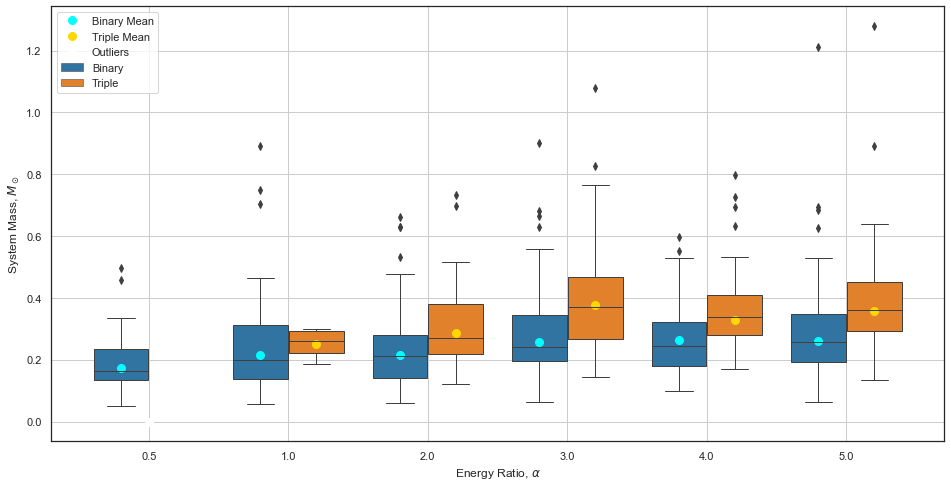

In [33]:
# Setting how many files of data we have
nFiles = 6
parameters = ["5-100-0.5", "5-100-1", "5-100-2", "5-100-3", "5-100-4", "5-100-5"]
column = 2
nStars = [0.5, 1, 2, 3, 4, 5]
normalisation = 1.99e30

# Creating dataframe columns
columns = ["SemiMajorAxis", "Type", "NStars"]

# Creating empty lists
a = []
t = []
n = []
meansB = []
SDsB = []
meansT = []
SDsT = []
binaryNum = []
tripleNum = []

# Looping through every file
for i in range(nFiles):
    
    # Generating the filenames
    filenameB = "binaryData" + parameters[i] + ".csv"
    filenameT = "tripleData" + parameters[i] + ".csv"
    
    # Loading in the files as dataframes
    dataFrameB = pd.read_csv(filenameB, header=None)
    dataFrameT = pd.read_csv(filenameT, header=None)
    
    # Getting rid of NaN in the triple data
    dataFrameT = dataFrameT.dropna()
    
    # Extracting the semi-major axis data
    aB = dataFrameB[column].to_numpy()
    aT = dataFrameT[column].to_numpy()
    
    
    # Outliers Binaries
    q1B, q2B, q3B = np.percentile(aB, [25, 50, 75])
    IQRB = q3B - q1B
    upperB = q3B + 1.5*IQRB
    lowerB = q1B - 1.5*IQRB    
    aBNO = aB[aB<=upperB]
    aBNO = aBNO[aBNO>=lowerB]
    
    meansB.append(np.mean(aBNO/normalisation))
    SDsB.append(np.std(aBNO)/normalisation)
    
    if len(aT) > 0:
    
        # Calculating the quartiles etc
        q1T, q2T, q3T = np.percentile(aT, [25, 50, 75])

        # Finding the inter-quartile range
        IQRT = q3T - q1T

        # Finding the outlier ranges
        upperT = q3T + 1.5*IQRT
        lowerT = q1T - 1.5*IQRT

        # Getting the binaires outside this range
        aTNO = aT[aT<=upperT]
        aTNO = aTNO[aTNO>=lowerT]

        # Calculating the means and SDs
        meansT.append(np.mean(aTNO/normalisation))
        SDsT.append(np.std(aTNO)/normalisation)
        
    else:
        pass
    
    binaryNum.append(len(aB))
    tripleNum.append(len(aT))
    
    # Looping
    for j in range(len(aB)):
        a.append(aB[j]/normalisation)
        t.append("Binary")
        n.append(nStars[i])
        
    for j in range(len(aT)):
        a.append(aT[j]/normalisation)
        t.append("Triple")
        n.append(nStars[i])     
        
# Creating dictionary
dict = {"SemiMajorAxis" : a, "Type": t, "NStars": n}
        
# Creating a dataframe
df = pd.DataFrame(dict)

sns.set(font_scale = 1.3)

# Plotting
plt.figure(figsize=(16,8))
sns.set_style(style="white")
sns.set_context("notebook")
ax = sns.boxplot(x="NStars", y="SemiMajorAxis", data=df, showfliers=True, hue="Type", linewidth=1, palette="tab10")

# Data for plotting the means and standard deviation ranges
meansB = np.array(meansB)
meansT = np.array(meansT)

bposes = np.array([0,1,2,3,4,5])
bposes = bposes - 0.2
tposes = np.array([1,2,3,4,5])
tposes = tposes + 0.2

# Calculating means and SDs
plt.plot(bposes, meansB, "o", markersize=8, linewidth=1, label="Binary Mean", color="cyan")
#plt.fill_between(bposes, meansB+SDsB, meansB-SDsB, color="royalblue", alpha=0.2, label="Binary 1$\sigma$ Range", linewidth=1)
plt.plot(tposes, meansT, "o", markersize=8, linewidth=1, label="Triple Mean", color="gold")
#plt.fill_between(tposes, meansT+SDsT, meansT-SDsT, color="orange", alpha=0.2, label="Triple 1$\sigma$ Range", linewidth=1)
#plt.yscale("log")

plt.grid(True)
plt.xlabel("Energy Ratio, $\\alpha$")
plt.ylabel("System Mass, $M_\odot$")
plt.plot(0,0, "wD", label="Outliers")
plt.legend()
plt.savefig("alphaSystemMass.png", dpi=300, bbox_inches='tight')

print(pearsonr(nStars, meansB))
print(pearsonr(nStars[1:], meansT))


print(spearmanr(nStars, meansB))
print(spearmanr(nStars[1:], meansT))

In [ ]:
# Creating arrays
binaryFrac = []
tripleFrac = []
totStars = 0
totBins = 0
totTrips = 0

# Looping through all the files
for i in range(nFiles):
    # Generating the filename
    filename = "binaryNumbers" + parameters[i] + ".csv"
    
    # Loading in the files as dataframes
    dataFrameN = pd.read_csv(filename, header=None)
    
    # Summing over the total number of stars, binaries, etc
    totStars = np.sum(dataFrameN[0].to_numpy())
    totBins = np.sum(dataFrameN[1].to_numpy())
    totTrips = np.sum(dataFrameN[2].to_numpy())
    
    # Adding the fractions to the arrays
    binaryFrac.append(totBins/totStars)
    tripleFrac.append(totTrips/totStars)
    
# Plotting
plt.figure(figsize=(16,8))
plt.plot([0.5,1,2,3,4,5], binaryFrac)
plt.plot([0.5,1,2,3,4,5], tripleFrac)

105 29
102 25
100 32
84 21
105 33
101 27
(0.6556231061526122, 0.15747240203443744)
(0.3677050184086843, 0.4733006150254111)
SpearmanrResult(correlation=0.8285714285714287, pvalue=0.04156268221574334)
SpearmanrResult(correlation=-0.08571428571428573, pvalue=0.8717434402332361)


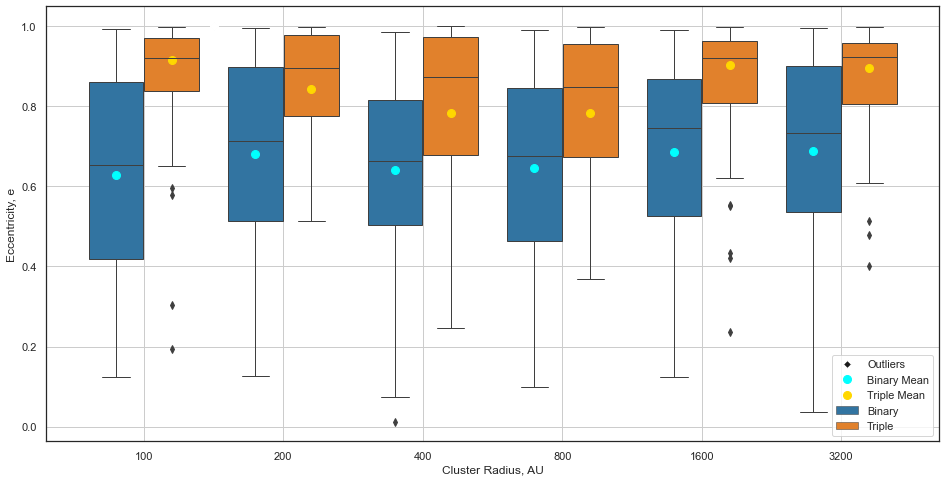

In [36]:
# Setting how many files of data we have
nFiles = 6
parameters = ["5-100-2", "5-200-2", "5-400-2", "5-800-2", "5-1600-2", "5-3200-2"]
column = 6
nStars = [100, 200, 400, 800, 1600, 3200]

normalisation = 1

# Creating dataframe columns
columns = ["SemiMajorAxis", "Type", "NStars"]

# Creating empty lists
a = []
t = []
n = []
meansB = []
SDsB = []
meansT = []
SDsT = []

# Looping through every file
for i in range(nFiles):
    # Generating the filenames
    filenameB = "binaryData" + parameters[i] + ".csv"
    filenameT = "tripleData" + parameters[i] + ".csv"
    
    # Loading in the files as dataframes
    dataFrameB = pd.read_csv(filenameB, header=None)
    dataFrameT = pd.read_csv(filenameT, header=None)
    
    # Getting rid of NaN in the triple data
    dataFrameT = dataFrameT.dropna()
    
    # Extracting the semi-major axis data
    aB = 1/dataFrameB[column].to_numpy()
    aT = 1/dataFrameT[column].to_numpy()
    
    # Outliers Binaries
    q1B, q2B, q3B = np.percentile(aB, [25, 50, 75])
    IQRB = q3B - q1B
    upperB = q3B + 1.5*IQRB
    lowerB = q1B - 1.5*IQRB    
    aBNO = aB[aB<=upperB]
    aBNO = aBNO[aBNO>=lowerB]
    
    meansB.append(np.mean(aBNO/normalisation))
    SDsB.append(np.std(aBNO)/normalisation)
    
    # Calculating the quartiles etc
    q1T, q2T, q3T = np.percentile(aT, [25, 50, 75])

    # Finding the inter-quartile range
    IQRT = q3T - q1T

    # Finding the outlier ranges
    upperT = q3T + 1.5*IQRT
    lowerT = q1T - 1.5*IQRT

    # Getting the binaires outside this range
    aTNO = aT[aT<=upperT]
    aTNO = aTNO[aTNO>=lowerT]

    # Calculating the means and SDs
    meansT.append(np.mean(aTNO/normalisation))
    SDsT.append(np.std(aTNO)/normalisation)
    
    
    # Looping
    for j in range(len(aB)):
        a.append(aB[j]/normalisation)
        t.append("Binary")
        n.append(nStars[i])
        
    for j in range(len(aT)):
        a.append(aT[j]/normalisation)
        t.append("Triple")
        n.append(nStars[i])
        
    print(len(aB), len(aT))
        
# Creating dictionary
dict = {"SemiMajorAxis" : a, "Type": t, "NStars": n}
        
# Creating a dataframe
df = pd.DataFrame(dict)

# Plotting
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(16,8))
sns.set_style(style="white")
sns.set_context("notebook")
ax = sns.boxplot(x="NStars", y="SemiMajorAxis", data=df, hue="Type", palette="tab10", showfliers =True, linewidth=1)
plt.xlabel("Cluster Radius, AU")
plt.ylabel("Mass Ratio, q")
#plt.yscale("log")
plt.grid(True)
plt.plot(0.5,1, "kD", label="Outliers", linewidth=0, markeredgecolor="white")
plt.plot(0.5,1, "wD", linewidth=0, markeredgecolor="white")

# Data for plotting the means and standard deviation ranges
meansB = np.array(meansB)
meansT = np.array(meansT)

bposes = np.array([0,1,2,3,4,5])
bposes = bposes - 0.2
tposes = np.array([0,1,2,3,4,5])
tposes = tposes + 0.2



plt.plot(bposes, meansB, "o", markersize=8, linewidth=1, label="Binary Mean", color="cyan")
#plt.errorbar(bposes, meansB, yerr=SDsB, fmt=".k", capsize=4)
#plt.fill_between(bposes, (meansB+SDsB), (meansB-SDsB), color="royalblue", alpha=0.2, label="Binary 1$\sigma$ Range", linewidth=1)
#plt.fill_between(bposes, meansB+SDsB, meansB-SDsB, color="royalblue", alpha=0.2, label="Binary 1$\sigma$ Range", linewidth=1)

plt.plot(tposes, meansT, "o", markersize=8, linewidth=1, label="Triple Mean", color="gold")
#plt.fill_between(tposes, meansT+SDsT, (meansT-SDsT), color="orange", alpha=0.2, label="Triple 1$\sigma$ Range", linewidth=1)
#plt.yscale("log")

plt.legend(loc="best")

plt.savefig("radiusEccentricity.png", dpi=300, bbox_inches='tight')

print(pearsonr(nStars, (meansB)))
print(pearsonr(nStars, (meansT)))

print(spearmanr(nStars, meansB))
print(spearmanr(nStars, meansT))


In [ ]:
# Creating arrays
binaryFrac = []
tripleFrac = []
totStars = 0
totBins = 0
totTrips = 0

# Looping through all the files
for i in range(nFiles):
    # Generating the filename
    filename = "binaryNumbers" + parameters[i] + ".csv"
    
    # Loading in the files as dataframes
    dataFrameN = pd.read_csv(filename, header=None)
    
    # Summing over the total number of stars, binaries, etc
    totStars = np.sum(dataFrameN[0].to_numpy())
    totBins = np.sum(dataFrameN[1].to_numpy())
    totTrips = np.sum(dataFrameN[2].to_numpy())
    
    # Adding the fractions to the arrays
    binaryFrac.append(totBins/totStars)
    tripleFrac.append(totTrips/totStars)
    
# Plotting
plt.figure(figsize=(16,8))
plt.plot([100, 200, 400, 800, 1600, 3200], binaryFrac)
plt.plot([100, 200, 400, 800, 1600, 3200], tripleFrac)

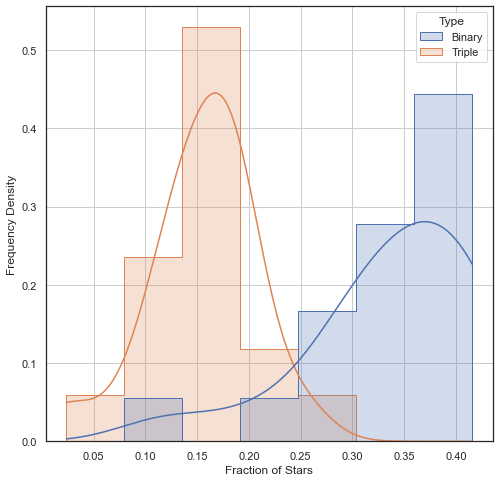

In [43]:
# Plot of every single binary and triple fraction
parameters = ["5-100-2", "6-100-2", "7-100-2", "8-100-2", "9-100-2", "10-100-2", "5-100-0.5", "5-100-1", "5-100-2", "5-100-3", "5-100-4", "5-100-5", "5-100-2", "5-200-2", "5-400-2", "5-800-2", "5-1600-2", "5-3200-2"]
nFiles = len(parameters)

# Creating arrays
f = []
t = []
totStars = 0
totBins = 0
totTrips = 0

# Looping through all the files
for i in range(nFiles):
    # Generating the filename
    filename = "binaryNumbers" + parameters[i] + ".csv"
    
    # Loading in the files as dataframes
    dataFrameN = pd.read_csv(filename, header=None)
    
    # Summing over the total number of stars, binaries, etc
    totStars = np.sum(dataFrameN[0].to_numpy())
    totBins = np.sum(dataFrameN[1].to_numpy())
    totTrips = np.sum(dataFrameN[2].to_numpy())
    
    # Adding the fractions to the arrays
    f.append(totBins/totStars)
    t.append("Binary")
    
    if totTrips > 0:
        t.append("Triple")
        f.append(totTrips/totStars)
    
# Creating dictionary
dict = {"Binary Fraction" : f, "Type": t}
        
# Creating a dataframe
df = pd.DataFrame(dict)   
    
plt.figure(figsize=(8,8))
sns.histplot(df, x="Binary Fraction", hue="Type", element="step", common_norm=False, kde=True, stat = "probability")
plt.xlabel("Fraction of Stars")
plt.ylabel("Frequency Density")
#plt.legend()
plt.grid(True)
plt.savefig("starFractions.png", dpi=300)


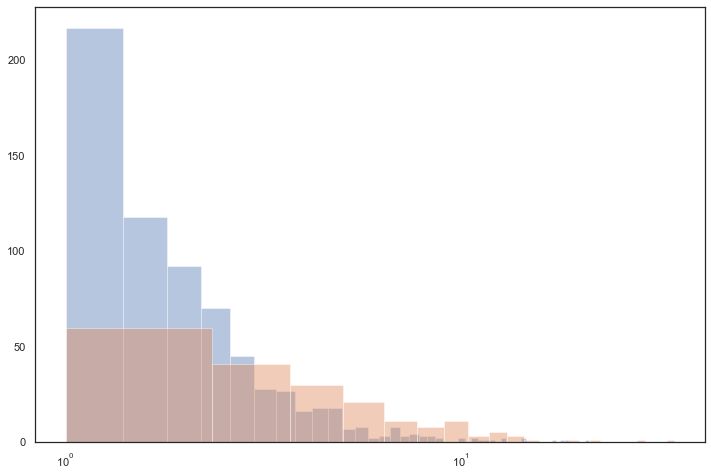

In [40]:
# Plot of fractions etc by thing changing
n = ["5-100-2", "6-100-2", "7-100-2", "8-100-2", "9-100-2", "10-100-2"]
a = ["5-100-0.5", "5-100-1", "5-100-2", "5-100-3", "5-100-4", "5-100-5"]
r = ["5-100-2", "5-200-2", "5-400-2", "5-800-2", "5-1600-2", "5-3200-2"]
nFiles = 6

colours = ["r", "g", "b"]

valuesB = []
valuesT = []

plt.figure(figsize=(12,8))

# Looping through every file
for i in range(nFiles):
    
    # Generating the filenames
    filenameB = "binaryData" + n[i] + ".csv"
    filenameT = "tripleData" + n[i] + ".csv"
    
    # Loading in the files as dataframes
    dataFrameB = pd.read_csv(filenameB, header=None)
    dataFrameT = pd.read_csv(filenameT, header=None)
    
    # Getting rid of NaN in the triple data
    dataFrameT = dataFrameT.dropna()
    
    # Extracting the eccentricity data
    eB = dataFrameB[6].to_numpy()
    eT = dataFrameT[6].to_numpy()

    
    # Looping
    for j in range(len(eB)):
        valuesB.append(eB[j])
        t.append("Binary")
        
    for j in range(len(eT)):
        valuesT.append(eT[j])
        t.append("Triple")
        
sns.distplot(valuesB, label="N, Binaries", kde=False)
sns.distplot(valuesT, label="N, Triples", kde=False)
plt.xscale("log")
    

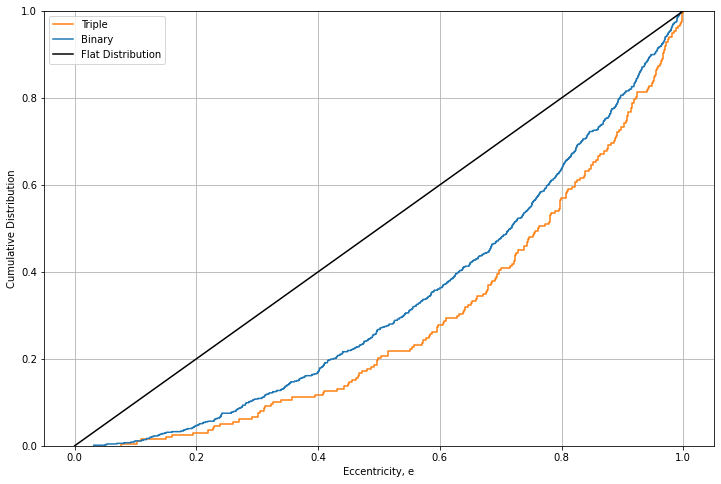

In [14]:
# Plot of every single binary and triple fraction
#parameters = ["5-100-2", "6-100-2", "7-100-2", "8-100-2", "9-100-2", "10-100-2", "5-100-0.5", "5-100-1", "5-100-2", "5-100-3", "5-100-4", "5-100-5", "5-100-2", "5-200-2", "5-400-2", "5-800-2", "5-1600-2", "5-3200-2"]
parameters = ["5-100-2", "6-100-2", "7-100-2", "8-100-2", "9-100-2", "10-100-2"]
nFiles = len(parameters)

e = []
t = []

plt.figure(figsize=(12,8))

# Looping through every file
for i in range(nFiles):
    
    # Generating the filenames
    filenameB = "binaryData" + parameters[i] + ".csv"
    filenameT = "tripleData" + parameters[i] + ".csv"
    
    # Loading in the files as dataframes
    dataFrameB = pd.read_csv(filenameB, header=None)
    dataFrameT = pd.read_csv(filenameT, header=None)
    
    # Getting rid of NaN in the triple data
    dataFrameT = dataFrameT.dropna()
    
    # Extracting the eccentricity data
    eB = dataFrameB[4].to_numpy()
    eT = dataFrameT[4].to_numpy()

    
    # Looping
    for j in range(len(eB)):
        e.append(eB[j])
        t.append("Binary")
        
    for j in range(len(eT)):
        e.append(eT[j])
        t.append("Triple")
        
    # Creating dictionary
    dict = {"Eccentricity" : e, "Type": t}
        
    # Creating a dataframe
    df = pd.DataFrame(dict)   
    

#sns.histplot(df, x="Eccentricity", hue="Type", element="step", common_norm=False, kde=True, stat = "probability")
sns.ecdfplot(df, x="Eccentricity", hue="Type")
x = np.linspace(0, 1, 100)
y = x
plt.plot(x, y, "k-", label="Flat Distribution")
plt.xlabel("Eccentricity, e")
plt.ylabel("Cumulative Distribution")
plt.legend(["Triple","Binary", "Flat Distribution"])
plt.grid(True)
#plt.xscale("log")

plt.savefig("eccentricitiescumulative.png", dpi=300)

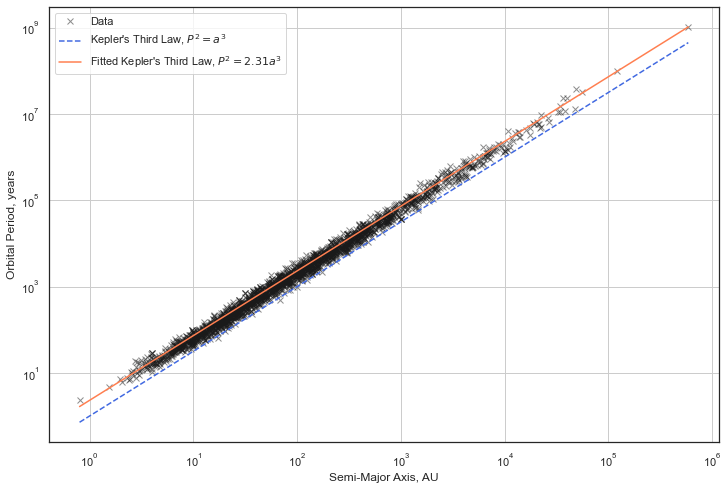

In [27]:
# Plot of every single binary and triple fraction
parameters = ["5-100-2", "6-100-2", "7-100-2", "8-100-2", "9-100-2", "10-100-2", "5-100-0.5", "5-100-1", "5-100-2", "5-100-3", "5-100-4", "5-100-5", "5-100-2", "5-200-2", "5-400-2", "5-800-2", "5-1600-2", "5-3200-2"]
nFiles = len(parameters)

a = []
p = []
m = []

# Looping through every file
for i in range(nFiles):
    
    # Generating the filenames
    filenameB = "binaryData" + parameters[i] + ".csv"
    filenameT = "tripleData" + parameters[i] + ".csv"
    
    # Loading in the files as dataframes
    dataFrameB = pd.read_csv(filenameB, header=None)
    dataFrameT = pd.read_csv(filenameT, header=None)
    
    # Getting rid of NaN in the triple data
    dataFrameT = dataFrameT.dropna()
    
    # Extracting the semi-major axis data
    aB = dataFrameB[1].to_numpy()
    aT = dataFrameT[1].to_numpy()
    pB = dataFrameB[3].to_numpy()
    pT = dataFrameT[3].to_numpy()
    mB = dataFrameB[2].to_numpy()
    mT = dataFrameT[2].to_numpy()
    
    # Looping
    for j in range(len(aB)):
        a.append(aB[j]/1.5e11)
        p.append(pB[j]/(365*24*60*60))
        m.append(mB[j])
        
    for j in range(len(aT)):
        a.append(aT[j]/1.5e11)
        p.append(pT[j]/(365*24*60*60))
        m.append(mT[j])

x = np.linspace(min(a), max(a), 10000)
y = x**(3/2)

def k3(x, a):
    return x**(3/2) * a 

popt, pcov = curve_fit(k3, a, p)

y2 = k3(x, popt[0])


plt.figure(figsize=(12,8))
plt.plot(a, p, "kx", label="Data", alpha=0.5)
plt.plot(x, y, color="royalblue", linestyle="--", label="Kepler's Third Law, $P^2 = a^3$", alpha=1)
plt.plot(x, y2, label="Fitted Kepler's Third Law, $P^2 = 2.31 a^3 $", color="coral")
plt.yscale("log")
plt.xscale("log")
plt.grid(True)
plt.xlabel("Semi-Major Axis, AU")
plt.ylabel("Orbital Period, years")
plt.legend()
plt.savefig("periodSemiMajorAxisRelation.png", dpi=300)
    
    